In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Importing data from the csv file
df = pd.read_csv(r"C:\Users\USER\Documents\Restaurants.csv")
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [5]:
#Encoding features
df['Has Table booking'] = df['Has Table booking'].replace({'Yes': 1, 'No': 0})
df['Has Online delivery'] = df['Has Online delivery'].replace({'Yes': 1, 'No': 0})
df['Is delivering now'] = df['Is delivering now'].replace({'Yes': 1, 'No': 0})
df['Switch to order menu'] = df['Switch to order menu'].replace({'Yes': 1, 'No': 0})

In [6]:
rating_mapping = {
    'Not rated': 0,
    'Poor': 1,
    'Average': 2,
    'Good': 3,
    'Very Good': 4,
    'Excellent': 5
}


df['Rating text'] = df['Rating text'].replace(rating_mapping)

In [7]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [8]:
df.columns.get_loc("Aggregate rating")

17

In [65]:
df.shape

(9551, 21)

In [66]:
#Splitting the data into target variable and the related features
X = np.array(df[['Average Cost for two', 'Has Table booking', 
                 'Has Online delivery', 'Is delivering now', 
                 'Switch to order menu', 'Price range', 
                 'Rating text', 'Votes']])
Y = np.array(df["Aggregate rating"])

In [67]:
X[1:3]

array([[1200,    1,    0,    0,    0,    3,    5,  591],
       [4000,    1,    0,    0,    0,    4,    4,  270]], dtype=int64)

In [68]:
#Splitting data into training and testing set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 35)

In [69]:
#Creating Regression model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [71]:
y_pred = model.predict(x_test)

In [72]:
#Mean square error using Linear Regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.22894912274022747
R-squared Score: 0.9012147776202866


In [74]:
#Predicting rating for a new restaurant using Linear regression
new = np.array([[3000,0,1,1,0,2,3,600]])
pre = model.predict(new)
pre

array([3.72476655])

In [93]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42)
a_train,a_test,b_train,b_test = train_test_split(X,Y,test_size = 0.3,random_state = 35)
tree.fit(a_train, b_train)

DecisionTreeRegressor(random_state=42)

In [84]:
b_pred = tree.predict(x_test)
b_pred

array([0.        , 3.7       , 3.5       , ..., 3.        , 0.        ,
       3.02222222])

In [91]:
#Predicting Rating text using Decision tree
pred = tree.predict(new)
pred

array([3.7])

In [86]:
#Mean square error using Decision Tree
mse = mean_squared_error(b_test, b_pred)
r2 = r2_score(b_test, b_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.590070843482996
R-squared Score: 0.6885420008577331


In [94]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
c_train,c_test,d_train,d_test = train_test_split(X,Y,test_size = 0.3,random_state = 35)
mod = RandomForestRegressor(n_estimators=100, random_state=42)
mod.fit(c_train,d_train)

RandomForestRegressor(random_state=42)

In [95]:
c_pred = tree.predict(x_test)
c_pred

array([0.        , 3.7       , 3.5       , ..., 3.        , 0.        ,
       3.02222222])

In [96]:
#Mean square error using Random Forest
mse = mean_squared_error(d_test, c_pred)
r2 = r2_score(d_test, c_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.052371117061521796
R-squared Score: 0.9774033095943921


In [92]:
#Predicting Rating text using RandomForest
pred_random = tree.predict(new)
pred_random

array([3.7])

In [122]:
#Top 10 cuisines with large aggregate rating
cuisine = df.groupby("Cuisines")["Aggregate rating"].mean()
cuisine.sort_values(ascending = False).head(10)

Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64

In [120]:
#Top 10 cuisines with large aggregate Votes
cuisine_votes = df.groupby("Cuisines")["Votes"].mean()
cuisine_votes.sort_values(ascending = False).head(10)
   

Cuisines
Italian, American, Pizza                                               10934.000000
American, Burger, Cafee                                                 9667.000000
Finger Food, North Indian, Italian, Continental, Thai, South Indian     5705.000000
American, Continental, Italian, North Indian, Asian                     4914.000000
European, Mediterranean, North Indian                                   4180.333333
Cafee, Mexican, American, Italian, Lebanese, Continental                4085.000000
American, North Indian, European, Asian                                 3697.000000
North Indian, Mediterranean, Asian, Continental                         3413.000000
American, Desserts, Steak                                               3157.000000
Desserts, Bar Food                                                      3074.000000
Name: Votes, dtype: float64

In [ ]:
#Comparison of efficiency of algorithms using Mean Square error

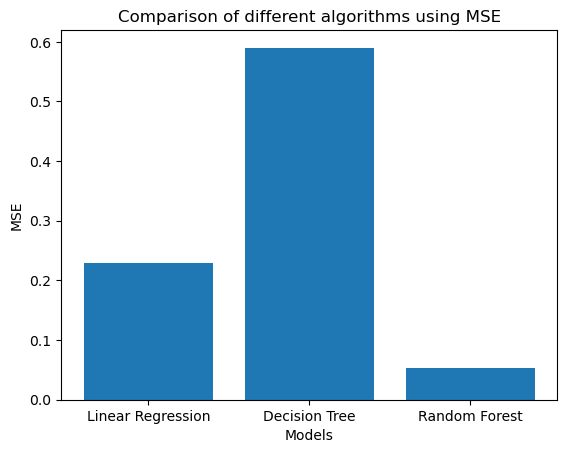

In [9]:
model = ["Linear Regression", "Decision Tree", "Random Forest"]
mse = [0.22894912274022747,0.590070843482996,0.052371117061521796]
plt.bar(model,mse)
plt.xlabel("Models")
plt.ylabel("MSE")
plt.title("Comparison of different algorithms using MSE")
plt.show()